# KMeans Clustering Analysis

In [ ]:
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'capstone-400517' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=capstone-400517:US:bquxjob_329a86e0_18b598ac678)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_537ffe8_18b5dda2fe8') # Job ID inserted based on the query results selected to explore
print(job.query)



SELECT 
    RACE,
    ASTHMA,
    FEMALE,
    PL_NCHS,
    HOSP_REGION,
    ZIPINC_QRTL,
    AGE_NEO,
    PAY1,
    TOTCHG,
    LOS

FROM 
    `capstone-400517.capstone2.table_core`




# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_537ffe8_18b5dda2fe8') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,RACE,ASTHMA,FEMALE,PL_NCHS,HOSP_REGION,ZIPINC_QRTL,AGE_NEO,PAY1,TOTCHG,LOS
0,5,None,0,6.0,4,nan,5,1.0,101811,10
1,3,None,0,3.0,4,1,17,nan,5017,2
2,1,0,1,nan,3,nan,5,5.0,592219,4
3,2,0,1,2.0,4,4,20,1,8402,2
4,1,0,1,2.0,3,4,17,1.0,26623,5
...,...,...,...,...,...,...,...,...,...,...
3087211,3,0,0,3.0,4,1,00,6.0,482019,13
3087212,1,0,0,4.0,3,3,00,6.0,16739,5
3087213,1,0,0,3.0,3,3,9,6.0,16540,2
3087214,6,3,1,3.0,3,3,11,6.0,88031,7


# Creating Clusters with KMeans clustering algorithm

In [ ]:
#Importing library for kMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [ ]:
#Scaling the dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_asthma)

In [ ]:
scaled_features

array([[-0.84603957, -0.99453981, -0.96963038, ..., -0.13979912,
        -1.84875066,  0.87037889],
       [-0.05501103,  1.00549017, -0.96963038, ...,  0.77241355,
         0.18347757,  0.87037889],
       [-0.84603957, -0.99453981,  0.43083452, ..., -0.29183457,
         0.18347757,  0.87037889],
       ...,
       [ 3.10910312,  1.00549017,  1.13106697, ...,  0.46834266,
         0.18347757,  0.87037889],
       [ 0.73601751, -0.99453981, -0.96963038, ..., -0.29183457,
         0.18347757, -0.91187139],
       [ 3.10910312,  1.00549017,  0.43083452, ...,  0.46834266,
         0.18347757,  0.87037889]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

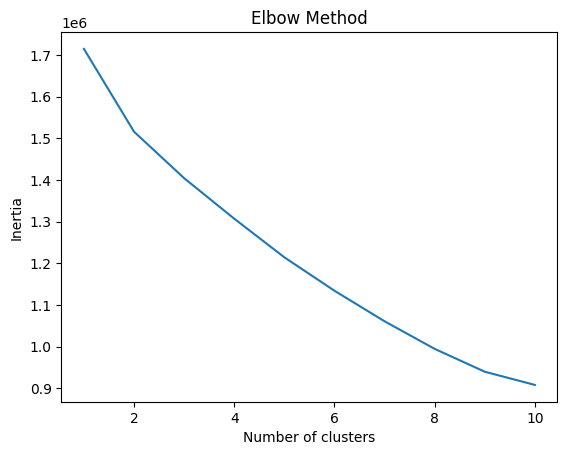

In [ ]:
# Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Initialize KMeans with k clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model
kmeans.fit(scaled_features)

# Get the cluster labels for each data point
labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Add the cluster labels as a new column in the original DataFrame
df_asthma['Cluster'] = labels

In [ ]:
#Export result to CSV
df_asthma.to_csv("/df_cluster_new.csv")